In [1]:
import numpy as np 
import pandas as pd
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.cluster import KMeans
from sklearn.metrics import adjusted_rand_score
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.manifold import TSNE

In [2]:
df_orig = pd.read_csv('winequality-red.csv')

In [3]:
df = df_orig.copy()

In [4]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [5]:
df.shape

(1599, 12)

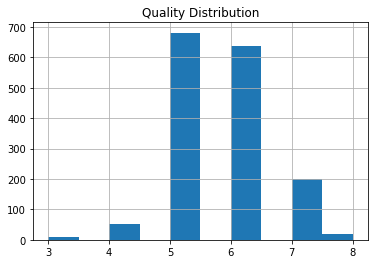

In [6]:
df['quality'].hist();
plt.title('Quality Distribution');

In [7]:
df['quality'].nunique()

6

In [8]:
df['quality'].unique()

array([5, 6, 7, 4, 8, 3])

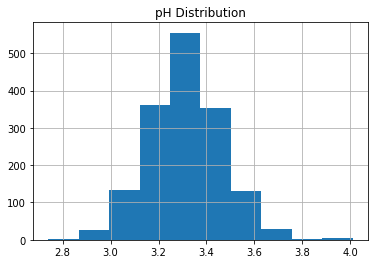

In [9]:
df['pH'].hist();
plt.title('pH Distribution');

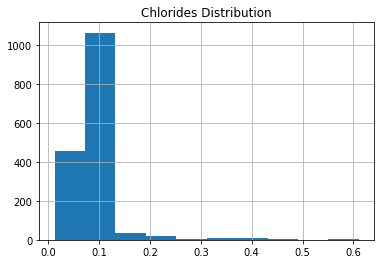

In [10]:
df['chlorides'].hist();
plt.title('Chlorides Distribution');

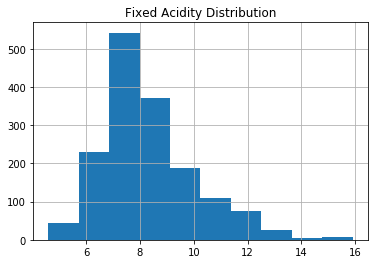

In [11]:
df['fixed acidity'].hist();
plt.title('Fixed Acidity Distribution');

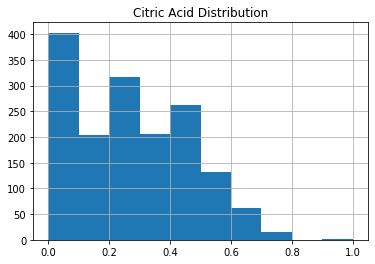

In [12]:
df['citric acid'].hist();
plt.title('Citric Acid Distribution');

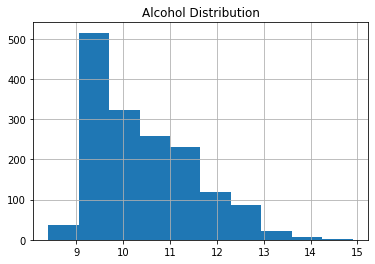

In [13]:
df['alcohol'].hist();
plt.title('Alcohol Distribution');

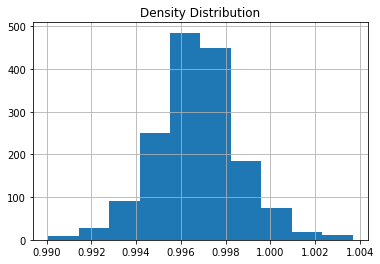

In [14]:
df['density'].hist();
plt.title('Density Distribution');

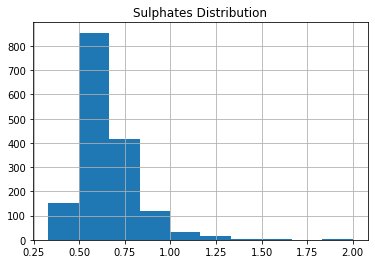

In [15]:
df['sulphates'].hist();
plt.title('Sulphates Distribution');

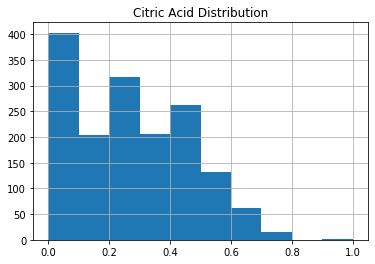

In [16]:
df['citric acid'].hist();
plt.title('Citric Acid Distribution');

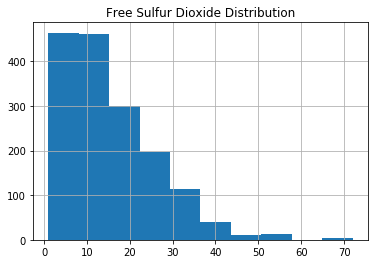

In [17]:
df['free sulfur dioxide'].hist();
plt.title('Free Sulfur Dioxide Distribution');

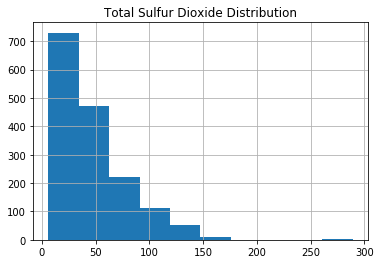

In [18]:
df['total sulfur dioxide'].hist();
plt.title('Total Sulfur Dioxide Distribution');

In [19]:
# we can see there is an imbalance in different quality
df['quality'].value_counts(True).sort_values()

3    0.006254
8    0.011257
4    0.033146
7    0.124453
6    0.398999
5    0.425891
Name: quality, dtype: float64

In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1599 entries, 0 to 1598
Data columns (total 12 columns):
fixed acidity           1599 non-null float64
volatile acidity        1599 non-null float64
citric acid             1599 non-null float64
residual sugar          1599 non-null float64
chlorides               1599 non-null float64
free sulfur dioxide     1599 non-null float64
total sulfur dioxide    1599 non-null float64
density                 1599 non-null float64
pH                      1599 non-null float64
sulphates               1599 non-null float64
alcohol                 1599 non-null float64
quality                 1599 non-null int64
dtypes: float64(11), int64(1)
memory usage: 150.0 KB


In [21]:
df.isna().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64

In [22]:
df.describe()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
count,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000,1599.000000
mean,8.319637,0.527821,0.270976,2.538806,0.087467,15.874922,46.467792,0.996747,3.311113,0.658149,10.422983,5.636023
std,1.741096,0.179060,0.194801,1.409928,0.047065,10.460157,32.895324,0.001887,0.154386,0.169507,1.065668,0.807569
min,4.600000,0.120000,0.000000,0.900000,0.012000,1.000000,6.000000,0.990070,2.740000,0.330000,8.400000,3.000000
25%,7.100000,0.390000,0.090000,1.900000,0.070000,7.000000,22.000000,0.995600,3.210000,0.550000,9.500000,5.000000
50%,7.900000,0.520000,0.260000,2.200000,0.079000,14.000000,38.000000,0.996750,3.310000,0.620000,10.200000,6.000000
75%,9.200000,0.640000,0.420000,2.600000,0.090000,21.000000,62.000000,0.997835,3.400000,0.730000,11.100000,6.000000
max,15.900000,1.580000,1.000000,15.500000,0.611000,72.000000,289.000000,1.003690,4.010000,2.000000,14.900000,8.000000


In [23]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [24]:
#sns.pairplot(df)

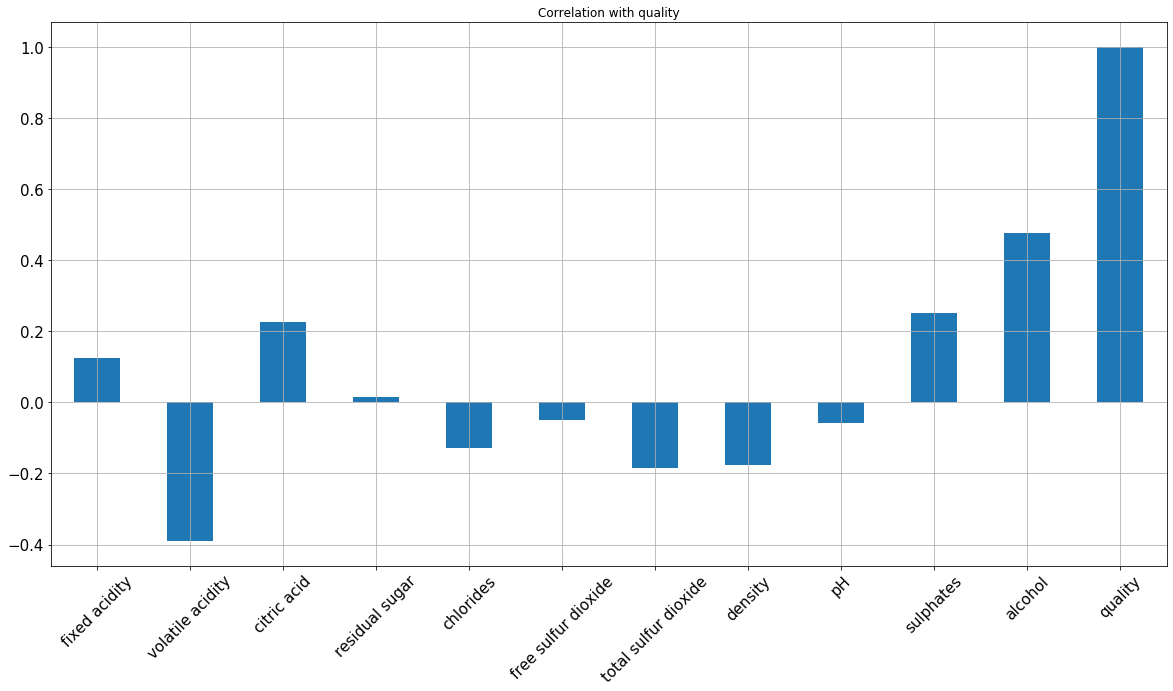

In [25]:
#Correlation with Quality with respect to attributes
cc = df.corrwith(df.quality).plot.bar(
        figsize = (20, 10), title = "Correlation with quality", fontsize = 15,
        rot = 45, grid = True)


In [26]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [27]:
ff = df.groupby('quality').agg({'density':'count'}).reset_index()

In [28]:
ff.rename({'density':'Count'},axis=1, inplace=True)

In [29]:
ff.sort_values(by = 'Count')

,quality,Count
0,3,10
5,8,18
1,4,53
4,7,199
3,6,638
2,5,681


In [30]:
df.groupby('quality').agg({'density':'mean'}).reset_index()

,quality,density
0,3,0.997464
1,4,0.996542
2,5,0.997104
3,6,0.996615
4,7,0.996104
5,8,0.995212


In [31]:
df.groupby('quality').agg({'pH':'mean'}).reset_index()

,quality,pH
0,3,3.398000
1,4,3.381509
2,5,3.304949
3,6,3.318072
4,7,3.290754
5,8,3.267222


In [32]:
df.groupby('quality').agg({'chlorides':'mean'}).reset_index()

,quality,chlorides
0,3,0.122500
1,4,0.090679
2,5,0.092736
3,6,0.084956
4,7,0.076588
5,8,0.068444


In [33]:
rsmean = df.groupby('quality').agg({'residual sugar':'mean'}).reset_index()

Text(0.5, 1.0, 'Residual Sugar ')

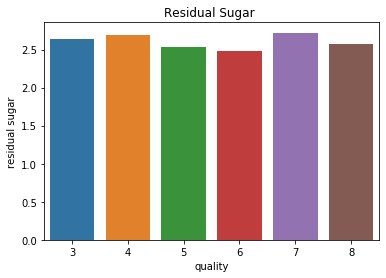

In [34]:
sns.barplot(data = rsmean, x='quality',y='residual sugar')
plt.title("Residual Sugar ")

In [35]:
ccmean = df.groupby('quality').agg({'citric acid':'mean'}).reset_index()

In [36]:
ccmean

,quality,citric acid
0,3,0.171000
1,4,0.174151
2,5,0.243686
3,6,0.273824
4,7,0.375176
5,8,0.391111


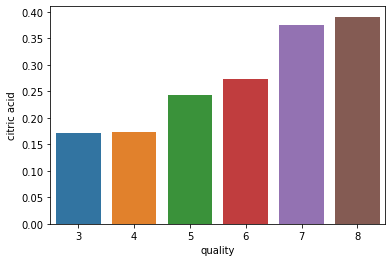

In [37]:
sns.barplot(data = ccmean, x='quality',y='citric acid')

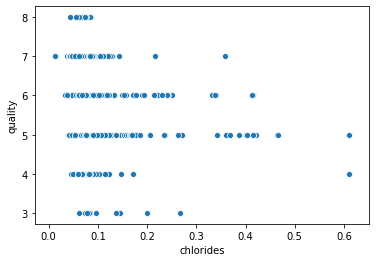

In [38]:
sns.scatterplot(x="chlorides", y="quality", data=df)

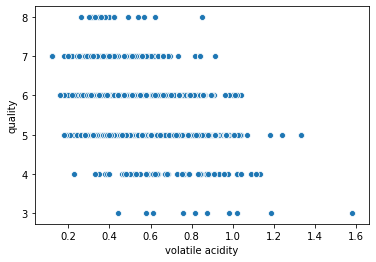

In [39]:
sns.scatterplot(x="volatile acidity", y="quality", data=df)

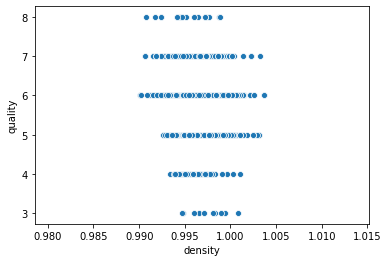

In [40]:
sns.scatterplot(x="density", y="quality", data=df)

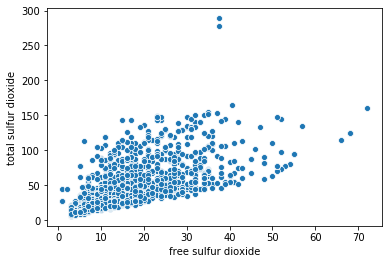

In [41]:
sns.scatterplot(x="free sulfur dioxide", y="total sulfur dioxide", data=df)

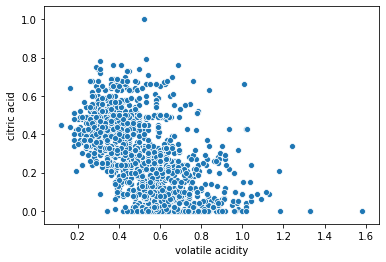

In [42]:
sns.scatterplot(x="volatile acidity", y="citric acid", data=df)

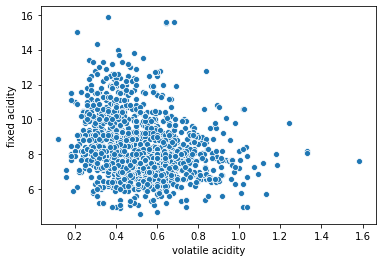

In [43]:
sns.scatterplot(x="volatile acidity", y="fixed acidity", data=df)

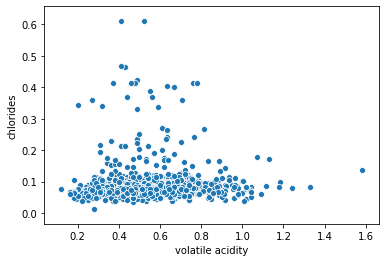

In [44]:
sns.scatterplot(x="volatile acidity", y="chlorides", data=df)

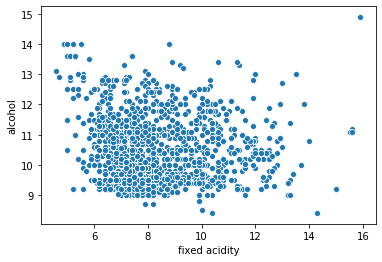

In [45]:
sns.scatterplot(x="fixed acidity", y="alcohol", data=df)

# Modeling / Machine Learning

In [48]:
from sklearn.cluster import KMeans 

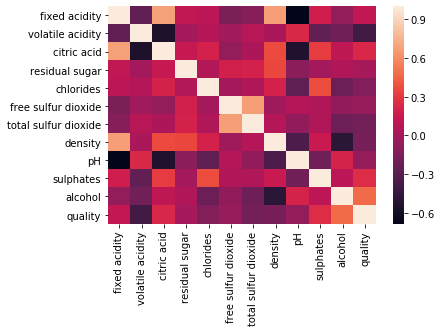

In [47]:
corr = df.corr() 
sns.heatmap(corr)

In [49]:
model = KMeans(n_clusters=4)

In [51]:
model.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [52]:
model.labels_

array([1, 3, 0, ..., 0, 0, 0], dtype=int32)

In [53]:
model.cluster_centers_

array([[8.20156556e+00, 5.26360078e-01, 2.53953033e-01, 2.39863014e+00,
        9.01076321e-02, 1.91320939e+01, 4.74481409e+01, 9.96740665e-01,
        3.32970646e+00, 6.73307241e-01, 1.04061318e+01, 5.66340509e+00],
       [8.53393352e+00, 5.18157895e-01, 2.73365651e-01, 2.38885042e+00,
        8.39542936e-02, 8.36149584e+00, 2.06592798e+01, 9.96614238e-01,
        3.30565097e+00, 6.48227147e-01, 1.06132502e+01, 5.74930748e+00],
       [8.02647059e+00, 5.49460784e-01, 3.19313725e-01, 3.34558824e+00,
        8.95882353e-02, 2.98970588e+01, 1.30078431e+02, 9.97047745e-01,
        3.22882353e+00, 6.89019608e-01, 9.85686275e+00, 5.11764706e+00],
       [8.07537879e+00, 5.48712121e-01, 2.78712121e-01, 2.90852273e+00,
        9.11401515e-02, 2.47007576e+01, 8.28484848e+01, 9.97004205e-01,
        3.32185606e+00, 6.44015152e-01, 1.01539773e+01, 5.47348485e+00]])